In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [28]:
df_temp = pd.read_csv("ADBE.CSV",index_col="date")
df_temp["adjClose"].dropna(inplace=True)
df_prices = df_temp["adjClose"]
df_returns = np.log(df_prices.shift(0))-np.log(df_prices.shift(-1))


In [29]:
period_days = len(df_returns)
vola = df_returns.std() * (252/period_days) ** 0.5
d_quick_stats = {"mean" : df_returns.mean(),"vola" : vola, "skew" : df_returns.skew(), "kurt" : df_returns.kurt(), "std" : df_returns.std() ,"period (days)" : period_days}
d_quick_stats

{'mean': -0.0019183395701478925,
 'vola': 0.03711538295640723,
 'skew': -2.9605691181798983,
 'kurt': 17.17489579802424,
 'std': 0.02290811170119826,
 'period (days)': 96}

In [33]:
df_prices.sort_index(ascending=True, inplace=True)

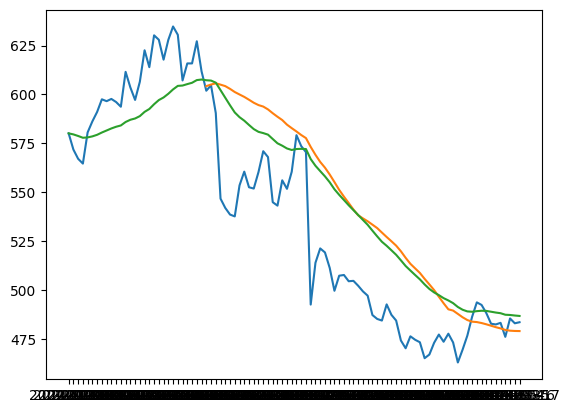

In [41]:
plt.plot(df_prices)
plt.plot(df_prices.rolling(window=30).mean())
plt.plot(df_prices.ewm(span=30, adjust=False).mean())